In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# %matplotlib qt5
sns.set_style('whitegrid')
sns.set_context('paper')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.5

In [2]:
from typing import Optional
import numbers

def auto_opt_pd_dtypes(df_: pd.DataFrame, inplace=False) -> Optional[pd.DataFrame]:
    """ Automatically downcast Number dtypes for minimal possible,
        will not touch other (datetime, str, object, etc)
        :param df_: dataframe
        :param inplace: if False, will return a copy of input dataset
        :return: `None` if `inplace=True` or dataframe if `inplace=False`
    """
    df_temp = df_ if inplace else df_.copy()
    print(df_temp.info())

    for col in df_temp.columns:
        # integers
        if issubclass(df_temp[col].dtypes.type, numbers.Integral):
            # unsigned integers
            if df_temp[col].min() >= 0:
                df_temp[col] = pd.to_numeric(df_temp[col], downcast='unsigned')
            # signed integers
            else:
                df_temp[col] = pd.to_numeric(df_temp[col], downcast='integer')
        # other real numbers
        elif issubclass(df_temp[col].dtypes.type, numbers.Real):
            df_temp[col] = pd.to_numeric(df_temp[col], downcast='float')

        elif issubclass(df_temp[col].dtypes.type, np.object_):
            df_temp[col] = pd.Categorical(df_temp[col])

    print(df_temp.info())
    if not inplace:
        return df_temp

In [3]:
df = pd.read_csv('kc_house_data.csv', header='infer', delimiter=',', parse_dates=['date'])
df = auto_opt_pd_dtypes(df)

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.511200,-122.257004,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721001,-122.319000,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.737900,-122.233002,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.520802,-122.392998,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.616798,-122.044998,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.699299,-122.346001,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.510700,-122.362000,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.594398,-122.299004,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.534500,-122.069000,1410,1287


In [4]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560051,-122.213898,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155899,-122.518997,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471001,-122.328003,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230003,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678001,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777599,-121.315002,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [5]:
df['id'].value_counts()

id
795000620     3
2231500030    2
1237500540    2
6117501820    2
7853420110    2
             ..
8091400200    1
3814700200    1
1202000200    1
1794500383    1
2008000270    1
Name: count, Length: 21436, dtype: int64

In [6]:
df.loc[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.504501,-122.330002,1070,6250
17603,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.504501,-122.330002,1070,6250
17604,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.504501,-122.330002,1070,6250


replace 0s with actual nan values

In [7]:
df['sqft_basement'] = df['sqft_basement'].replace(0, np.nan)
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
df['yr_renovated'] = df['yr_renovated'].replace(1, np.nan)

label specific columns

In [8]:
cols = [col for col in df.columns if col not in ('id', 'date')]
cols_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# view is mostly 0
cols_pairplot = [col for col in cols if col not in ('sqft_basement', 'zipcode', 'lat', 'long', 'view', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'floors', 'waterfront', 'condition')]

In [9]:
df = df.loc[df['bedrooms'] < 30]

In [10]:
df_log = df.copy()
df_log[cols_log] = np.log10(df_log[cols_log])

df_log

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,5.346157,3,1.00,3.071882,3.752048,1.0,0,0,...,7,3.071882,NaN,1955,NaN,98178,47.511200,-122.257004,3.127105,3.752048
1,6414100192,2014-12-09,5.730783,3,2.25,3.409933,3.859859,2.0,0,0,...,7,3.336460,2.602060,1951,1991.0,98125,47.721001,-122.319000,3.227887,3.883037
2,5631500400,2015-02-25,5.255272,2,1.00,2.886491,4.000000,1.0,0,0,...,6,2.886491,NaN,1933,NaN,98028,47.737900,-122.233002,3.434569,3.906443
3,2487200875,2014-12-09,5.781037,4,3.00,3.292256,3.698970,1.0,0,0,...,7,3.021189,2.959041,1965,NaN,98136,47.520802,-122.392998,3.133539,3.698970
4,1954400510,2015-02-18,5.707570,3,2.00,3.225309,3.907411,1.0,0,0,...,8,3.225309,NaN,1987,NaN,98074,47.616798,-122.044998,3.255272,3.875235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,5.556303,3,2.50,3.184691,3.053463,3.0,0,0,...,8,3.184691,NaN,2009,NaN,98103,47.699299,-122.346001,3.184691,3.178689
21609,6600060120,2015-02-23,5.602060,4,2.50,3.363612,3.764400,2.0,0,0,...,8,3.363612,NaN,2014,NaN,98146,47.510700,-122.362000,3.262451,3.857332
21610,1523300141,2014-06-23,5.604335,2,0.75,3.008600,3.130334,2.0,0,0,...,7,3.008600,NaN,2009,NaN,98144,47.594398,-122.299004,3.008600,3.302547
21611,291310100,2015-01-16,5.602060,3,2.50,3.204120,3.378034,2.0,0,0,...,8,3.204120,NaN,2004,NaN,98027,47.534500,-122.069000,3.149219,3.109579


In [11]:
df_num = df[cols]
for k,v in df_num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_outliers = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    print(f'outliers in {k}: {len(v_outliers)/len(v)*100:.2f}%')

outliers in price: 5.30%
outliers in bedrooms: 2.52%
outliers in bathrooms: 2.64%
outliers in sqft_living: 2.65%
outliers in sqft_lot: 11.22%
outliers in floors: 0.04%
outliers in waterfront: 100.00%
outliers in view: 100.00%
outliers in condition: 0.14%
outliers in grade: 8.84%
outliers in sqft_above: 2.86%
outliers in sqft_basement: 0.74%
outliers in yr_built: 0.00%
outliers in yr_renovated: 0.12%
outliers in zipcode: 0.00%
outliers in lat: 0.01%
outliers in long: 1.18%
outliers in sqft_living15: 2.52%
outliers in sqft_lot15: 10.15%


In [ ]:
# df = df[df['sqft_lot'] <= 50_000]

In [ ]:
# df_num = df[cols]
# for k,v in df_num.items():
#     q1 = v.quantile(0.25)
#     q3 = v.quantile(0.75)
#     iqr = q3 - q1
#     v_outliers = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
#     print(f'outliers in {k}: {len(v_outliers)/len(v)*100:.2f}%')
# 
# df

boxplots

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 8))

index = 0
axs = axs.flatten()
for k,v in df[cols].items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout()
plt.show()

ecdfplot

In [15]:
%matplotlib qt5
sns.ecdfplot(x='price', data=df)

<Axes: xlabel='price', ylabel='Proportion'>

In [17]:
np.log10(df['sqft_living'])

0        3.071882
1        3.409933
2        2.886491
3        3.292256
4        3.225309
           ...   
21608    3.184691
21609    3.363612
21610    3.008600
21611    3.204120
21612    3.008600
Name: sqft_living, Length: 21612, dtype: float32

In [14]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 8))

index = 0
axs = axs.flatten()
for k,v in df[cols].items():
    sns.ecdfplot(x=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout()
plt.show()

histogram/distribution

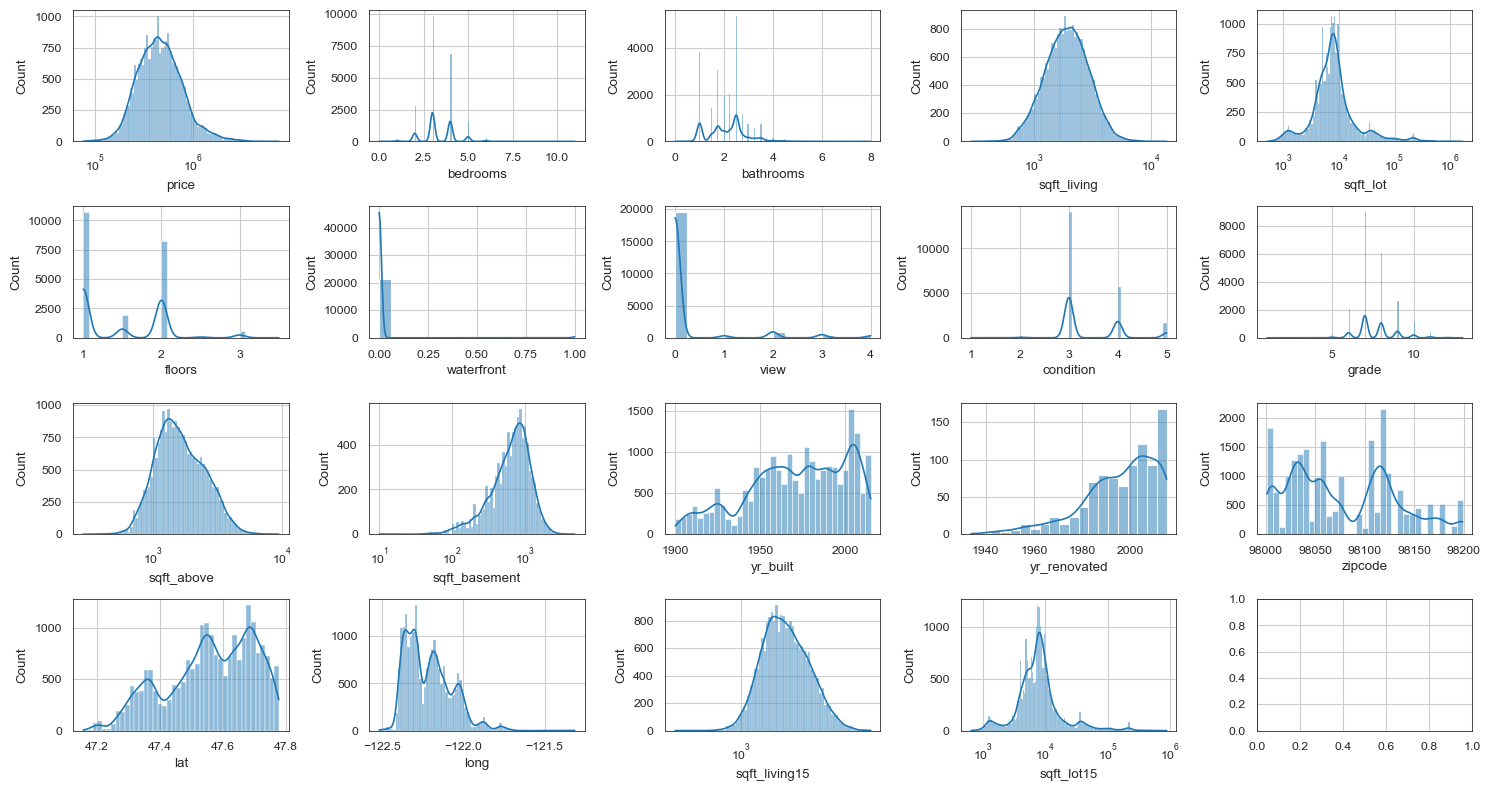

In [11]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 8))

index = 0
axs = axs.flatten()
for k,v in df[cols].items():
    if k in cols_log:
        sns.histplot(x=k, data=df, ax=axs[index], kde=True, log_scale=True)
    else:
        sns.histplot(x=k, data=df, ax=axs[index], kde=True, log_scale=False)
    index += 1
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(15, 8))

index = 0
axs = axs.flatten()
for k,v in df[list(set(cols) - set(cols_log))].items():
    sns.histplot(x=k, data=df, ax=axs[index], kde=True, log_scale=False)
    index += 1
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df[cols_pairplot])

In [ ]:
sns.heatmap(df[cols].corr('spearman')**2, annot=True)
plt.title('r^2 using Pearson')
plt.tight_layout()
plt.show()

In [ ]:
df[cols].corr()

In [ ]:
df[cols].corr('pearson')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pca import pca

num_data = df[cols].fillna(0)

minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()

cols_sel = [col for col in cols if col not in ('price', 'zipcode', 'lat', 'long')]
x = pd.DataFrame(data=standardscaler.fit_transform(num_data[cols_sel]), columns=cols_sel)

pca_input = x.dropna()
model = PCA(n_components=2)
pca_data = model.fit_transform(pca_input)

num_data[['PCA 1', 'PCA 2']] = pca_data

sns.scatterplot(data=num_data.sort_values(by='price', ascending=True), x='PCA 1', y='PCA 2', hue='price', palette='RdYlGn')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA')
plt.tight_layout()
plt.show()

print(f'Explained variance by first 2 compononents: {sum(model.explained_variance_ratio_):.3f}')

# model = pca(n_components=2)
# pca_data = model.fit_transform(pca_input)

In [ ]:
# model.biplot(alpha=0.2, s=30, color_arrow='r', figsize=(14, 8), arrowdict={'alpha': 1, 'color_weak': '#008808', 'scale_factor': 1}, dpi=80)

In [ ]:
for i in range(model.components_.shape[0]):
    arr = np.abs(model.components_[i])
    indices = np.argpartition(arr, -5)[-5:]
    indices = indices[np.argsort(arr[indices])[::-1]]
    input_cols = x.columns[indices]
    values = model.components_[i][indices]
    
    print(f'PCA component {i}:')
    for j in range(5):
        print(f'{input_cols[j]}:\t{values[j]:.3f}')
    print()

In [ ]:
plt.scatter(df['sqft_above']+df['sqft_basement'], df['sqft_living'])
plt.xlabel('basement + above')
plt.ylabel('sqft_living')
plt.tight_layout()

In [ ]:
from matplotlib.colors import LogNorm
import numpy as np

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 8), sharex=True, sharey=True)

index = 0
axs = axs.flatten()

for k, v in df[cols].items():
    data = df.sort_values(k)

    # Determine normalization
    if k in cols_log:
        # handle nonpositive values
        cvals = data[k].to_numpy()
        vmin = np.min(cvals[cvals > 0]) if np.any(cvals > 0) else 1e-6
        norm = LogNorm(vmin=vmin, vmax=np.max(cvals))
    else:
        norm = None

    sc = axs[index].scatter(
        data['lat'],
        data['long'],
        c=data[k],
        cmap='RdYlGn',
        norm=norm,
        alpha=0.6,
        s=1,
        linewidth=0
    )

    axs[index].set_title(k)
    plt.colorbar(sc, ax=axs[index])

    index += 1

plt.tight_layout()
plt.show()

In [ ]:
df.info()

In [ ]:
plt.scatter(df['sqft_living'], df['sqft_living15'])

standardize df

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[cols] = scaler.fit_transform(df[cols])

df_standardized

normalize df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols] = scaler.fit_transform(df[cols])

df_normalized

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(15, 8))

index = 0
axs = axs.flatten()
for k,v in df_normalized[cols].items():
    sns.boxplot(y=k, data=df_normalized, ax=axs[index])
    index += 1
plt.tight_layout()
plt.show()

In [ ]:
# Add suffixes to numeric columns
std_df_renamed = df_standardized[cols].add_suffix("_std")
norm_df_renamed = df_normalized[cols].add_suffix("_norm")

# Combine into one DataFrame
df_pair = pd.concat([std_df_renamed, norm_df_renamed], axis=1)

# sns.pairplot(df_pair)
# plt.tight_layout()

In [33]:
df_log['yr_renovated_new'] = 2025 - df_log['yr_renovated']
df_log['yr_built_new'] = 2025 - df_log['yr_built']
df_modelling = df_log.copy()

In [34]:
df_modelling = df_modelling[[col for col in df_modelling.columns if col not in ('zipcode', 'yr_built', 'yr_renovated', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot15')]]
df_modelling

,id,date,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,lat,long,yr_renovated_new,yr_built_new
0,7129300520,2014-10-13,5.346157,3,3.752048,1.0,0,0,3,3.071882,NaN,47.511200,-122.257004,NaN,70
1,6414100192,2014-12-09,5.730783,3,3.859859,2.0,0,0,3,3.336460,2.602060,47.721001,-122.319000,34.0,74
2,5631500400,2015-02-25,5.255272,2,4.000000,1.0,0,0,3,2.886491,NaN,47.737900,-122.233002,NaN,92
3,2487200875,2014-12-09,5.781037,4,3.698970,1.0,0,0,5,3.021189,2.959041,47.520802,-122.392998,NaN,60
4,1954400510,2015-02-18,5.707570,3,3.907411,1.0,0,0,3,3.225309,NaN,47.616798,-122.044998,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,5.556303,3,3.053463,3.0,0,0,3,3.184691,NaN,47.699299,-122.346001,NaN,16
21609,6600060120,2015-02-23,5.602060,4,3.764400,2.0,0,0,3,3.363612,NaN,47.510700,-122.362000,NaN,11
21610,1523300141,2014-06-23,5.604335,2,3.130334,2.0,0,0,3,3.008600,NaN,47.594398,-122.299004,NaN,16
21611,291310100,2015-01-16,5.602060,3,3.378034,2.0,0,0,3,3.204120,NaN,47.534500,-122.069000,NaN,21


In [35]:
df_modelling = df_modelling.sort_values('date').groupby('id').agg('last').reset_index()
df_modelling.loc[df_modelling['yr_renovated_new'].isna(), 'yr_renovated_new'] = df_modelling['yr_built_new']
df_modelling['sqft_basement'] = df_modelling['sqft_basement'].fillna(0)
df_modelling

,id,date,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,lat,long,yr_renovated_new,yr_built_new
0,1000102,2015-04-22,5.477121,6,3.971879,2.0,0,0,3,3.380211,0.000000,47.326199,-122.213997,34.0,34
1,1200019,2014-05-08,5.811240,4,4.415574,1.0,0,0,4,3.064458,2.954243,47.444401,-122.350998,78.0,78
2,1200021,2014-08-11,5.602060,3,4.633468,1.0,0,0,3,3.164353,0.000000,47.443401,-122.347000,73.0,73
3,2800031,2015-04-01,5.371068,3,3.880756,1.5,0,0,4,3.004321,2.623249,47.478298,-122.264999,95.0,95
4,3600057,2015-03-19,5.604766,4,3.544564,1.0,0,0,3,2.880814,2.949390,47.580299,-122.293999,12.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,9842300095,2014-07-25,5.562293,5,3.619928,1.5,0,0,3,3.204120,0.000000,47.529701,-122.380997,98.0,98
21431,9842300485,2015-03-11,5.579783,2,3.867585,1.0,0,0,5,2.924279,2.301030,47.528500,-122.377998,86.0,86
21432,9842300540,2014-06-24,5.530200,3,3.615740,1.0,0,0,4,2.857332,2.579784,47.529598,-122.378998,83.0,83
21433,9895000040,2014-07-03,5.601952,2,3.002166,1.5,0,0,3,2.954242,2.707570,47.544601,-122.017998,14.0,14


In [36]:
from sklearn.preprocessing import MinMaxScaler

cols_norm = [col for col in df_modelling.columns if col not in ('id', 'date')]
scaler = MinMaxScaler()
df_normalized = df_modelling.copy()
df_normalized[cols_norm] = scaler.fit_transform(df_modelling[cols_norm])

df_normalized

,id,date,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,lat,long,yr_renovated_new,yr_built_new
0,1000102,2015-04-22,0.299320,0.545455,0.358633,0.4,0.0,0.0,0.50,0.607344,0.000000,0.273925,0.253324,0.208696,0.208696
1,1200019,2014-05-08,0.465429,0.363636,0.485337,0.0,0.0,0.0,0.75,0.398401,0.802119,0.464053,0.139535,0.591304,0.591304
2,1200021,2014-08-11,0.361434,0.272727,0.547560,0.0,0.0,0.0,0.50,0.464504,0.000000,0.462445,0.142855,0.547826,0.547826
3,2800031,2015-04-01,0.246594,0.272727,0.332612,0.2,0.0,0.0,0.75,0.358607,0.712250,0.518576,0.210963,0.739130,0.739130
4,3600057,2015-03-19,0.362779,0.363636,0.236607,0.0,0.0,0.0,0.50,0.276878,0.800802,0.682645,0.186877,0.017391,0.556522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,9842300095,2014-07-25,0.341663,0.454545,0.258129,0.2,0.0,0.0,0.50,0.490819,0.000000,0.601258,0.114619,0.765217,0.765217
21431,9842300485,2015-03-11,0.350359,0.181818,0.328851,0.0,0.0,0.0,1.00,0.305640,0.624763,0.599325,0.117109,0.660870,0.660870
21432,9842300540,2014-06-24,0.325708,0.272727,0.256933,0.0,0.0,0.0,0.75,0.261340,0.700448,0.601092,0.116279,0.634783,0.634783
21433,9895000040,2014-07-03,0.361380,0.181818,0.081718,0.2,0.0,0.0,0.50,0.325468,0.735144,0.625225,0.416114,0.034783,0.034783


In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pca import pca

num_data = df_modelling[cols_norm]

minmaxscaler = MinMaxScaler()
standardscaler = StandardScaler()

x = pd.DataFrame(data=standardscaler.fit_transform(num_data[cols_norm]), columns=cols_norm)

pca_input = x.dropna()
model = PCA(n_components=5)
pca_data = model.fit_transform(pca_input)

num_data[['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5']] = pca_data

sns.scatterplot(data=num_data.sort_values(by='price', ascending=True), x='PCA 1', y='PCA 2', hue='price', palette='RdYlGn')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('PCA')
plt.tight_layout()
plt.show()

print(f'Explained variance by first 5 compononents: {sum(model.explained_variance_ratio_):.3f}')

# model = pca(n_components=2)
# pca_data = model.fit_transform(pca_input)

C:\Users\bo112\AppData\Local\Temp\ipykernel_9748\3956833134.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5']] = pca_data


Explained variance by first 5 compononents: 0.726


In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

linkage_methods = ['ward', 'average', 'complete']
for l in range(len(linkage_methods)):
    method = linkage_methods[l]
    results_silhouette = {}
    results_dbi = {}
    
    for i in tqdm(range(3, 11)):
        X = df_normalized[cols_norm]
        
        # setting distance_threshold=0 ensures we compute the full tree.
        model = AgglomerativeClustering(distance_threshold=None, n_clusters=i, linkage=method)
        
        model = model.fit(X)
        labels = model.labels_
        results_silhouette[i] = silhouette_score(X, labels)
        results_dbi[i] = davies_bouldin_score(X, labels)
        
    plt.plot(results_silhouette.keys(), results_silhouette.values())
    plt.title(f"Silhouette Score - Reduced Data ('{method}')")
    plt.xlabel('n Clusters')
    plt.ylabel('Silhouette Score')
    plt.tight_layout()
    plt.savefig(f'silhouette_reduced_{method}')
    plt.clf()
    
    plt.plot(results_dbi.keys(), results_dbi.values())
    plt.title(f"Davis-Bouldin Score - Reduced Data ('{method}')")
    plt.xlabel('n Clusters')
    plt.ylabel('Davis-Bouldin Score')
    plt.tight_layout()
    plt.savefig(f'dbi_reduced_{method}')
    plt.clf()


100%|██████████| 8/8 [03:55<00:00, 29.45s/it]


<Figure size 640x480 with 0 Axes>

In [113]:
temp1=pd.DataFrame(data={'min_cluster_size_pct': 1,
                   'min_cluster_size': 2,
                   'min_samples': 3,
                   'metric': 4,
                   'cluster_selection': 5}, 
             index=[0])
temp2=pd.DataFrame(data={'min_cluster_size_pct': 5,
                   'min_cluster_size': 2,
                   'min_samples': 3,
                   'metric': 4,
                   'cluster_selection': 5}, 
             index=[0])
pd.concat([temp1, temp2]).reset_index(drop=True)

,min_cluster_size_pct,min_cluster_size,min_samples,metric,cluster_selection
0,1,2,3,4,5
1,5,2,3,4,5


In [132]:
import numpy as np
from sklearn.cluster import HDBSCAN
import umap

setting_cols = ['n_components', 'min_cluster_size_pct', 'min_cluster_size', 'min_samples', 'n_clusters',
                'noise_pct', 'silhouette_score', 'dbi_score']
df_settings = pd.DataFrame(columns=setting_cols)


for n_components in (4, 6, 8, 10):
    reducer = umap.UMAP(n_components=n_components)
    data = df_modelling[[col for col in df_modelling.columns if col not in ('id', 'date')]].values
    scaled_data = StandardScaler().fit_transform(data)
    embedding = reducer.fit_transform(scaled_data)
    X = embedding
    for mcs_pct in tqdm((0.05, 0.025, 0.01, 0.005)):
        mcs = round(len(df_modelling) * mcs_pct)
        min_samples_list = [round(i * mcs) for i in [0.5, 0.25, 0.1, 0.05]]
        for min_samples in min_samples_list:
            clusterer = HDBSCAN(
                min_cluster_size=mcs,
                min_samples=min_samples,
                metric="euclidean"
            )
            labels = clusterer.fit_predict(X)
    
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_frac = np.mean(labels == -1)
    
            temp = pd.DataFrame(data={'n_components': n_components,
                                      'min_cluster_size_pct': mcs_pct,
                                      'min_cluster_size': mcs,
                                      'min_samples': min_samples,
                                      'n_clusters': n_clusters,
                                      'noise_pct': noise_frac,
                                      'silhouette_score': silhouette_score(X, labels),
                                      'dbi_score': davies_bouldin_score(X, labels)
                                      },
                                index=[0])
            df_settings = pd.concat([df_settings, temp]).reset_index(drop=True)

  0%|          | 0/4 [00:00<?, ?it/s]C:\Users\bo112\AppData\Local\Temp\ipykernel_9748\161196034.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_settings = pd.concat([df_settings, temp]).reset_index(drop=True)
100%|██████████| 4/4 [02:50<00:00, 42.63s/it]


In [133]:
df_settings.to_csv('HDBSCAN_parameter_results.csv', index=False)

In [134]:
sns.pairplot(df_settings)

In [131]:
sns.boxplot(df_settings, x='cluster_selection', y='dbi_score')

<Axes: xlabel='cluster_selection', ylabel='dbi_score'>

In [90]:
# plt.plot(n_clusters_list, results_silhouette.values())
plt.title(f"Silhouette Score - Reduced Data (HDBSCAN)")
plt.xlabel('n Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.savefig(f'silhouette_reduced_HDBSCAN_clusters')
plt.clf()

plt.plot(results_silhouette.keys(), results_silhouette.values())
plt.title(f"Silhouette Score - Reduced Data (HDBSCAN)")
plt.xlabel('min_clusters/N [%]')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.savefig(f'silhouette_reduced_HDBSCAN_percentage')
plt.clf()

plt.plot(n_clusters_list, results_dbi.values())
plt.title(f"Davis-Bouldin Score - Reduced Data (HDBSCAN)")
plt.xlabel('n Clusters')
plt.ylabel('Davis-Bouldin Score')
plt.tight_layout()
plt.savefig(f'dbi_reduced_HDBSCAN_clusters')
plt.clf()

plt.plot(results_dbi.keys(), results_dbi.values())
plt.title(f"Davis-Bouldin Score - Reduced Data (HDBSCAN)")
plt.xlabel('min_clusters/N [%]')
plt.ylabel('Davis-Bouldin Score')
plt.tight_layout()
plt.savefig(f'dbi_reduced_HDBSCAN_percentage')
plt.clf()


In [91]:
mcs, n_clusters, noise_frac, stability = zip(*results)

plt.figure()
plt.plot(mcs, n_clusters)
plt.xlabel("min_cluster_size")
plt.ylabel("Number of clusters")
plt.show()

plt.figure()
plt.plot(mcs, noise_frac)
plt.xlabel("min_cluster_size")
plt.ylabel("Noise fraction")
plt.show()

plt.figure()
plt.plot(mcs, stability)
plt.xlabel("min_cluster_size")
plt.ylabel("Mean cluster stability")
plt.show()


In [82]:
X = df_normalized[cols_norm]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=None, n_clusters=6, linkage='ward')

model = model.fit(X)
labels = model.labels_

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [144]:
reducer = umap.UMAP(n_components=6)
data = df_modelling[[col for col in df_modelling.columns if col not in ('id', 'date')]].values
scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
X = embedding
mcs = round(len(df_modelling) * 0.025)
min_samples = round(mcs * 0.25)
clusterer = HDBSCAN(
    min_cluster_size=mcs,
    min_samples=min_samples,
    metric="euclidean"
)
labels = clusterer.fit_predict(X)

In [64]:
import umap

In [137]:
from sklearn.preprocessing import StandardScaler

data = df_modelling[cols_norm].values
scaled_data = StandardScaler().fit_transform(data)

In [147]:
reducer = umap.UMAP()

In [148]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(21435, 2)

In [149]:
df_results = pd.DataFrame(data=embedding)
df_results = pd.concat([df_results, df_modelling], axis=1)
df_results['label'] = labels
# df_results

In [152]:
col = 'label'
results_sorted = df_results.sort_values(col)
plt.scatter(x=results_sorted.iloc[:, 0], y=results_sorted.iloc[:, 1], s=3, c=results_sorted[col], cmap='tab10_r', alpha=0.7)
plt.colorbar()
plt.title('Hierarchical Clustering on projected Data (n=6, linkage=ward)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
# plt.savefig('hierarchical_n6_ward_projected')

In [153]:
df_results['price_real'] = 10**df_results['price']
cluster_data = df_results.groupby('label')['price_real'].agg(['mean', 'median', 'std', 'max', 'min'])
cluster_data

,mean,median,std,max,min
label,,,,,
-1,1.340663e+06,949974.96875,1.091034e+06,7062500.50,285000.062500
0,5.064622e+05,474800.12500,1.829808e+05,1850000.50,204999.953125
1,4.393474e+05,375000.06250,2.571294e+05,2719999.75,88999.984375
2,4.847778e+05,415000.09375,2.805156e+05,4489000.50,74999.960938
3,5.636593e+05,517999.93750,2.920550e+05,3300001.75,133999.984375
4,5.539474e+05,468999.75000,3.506390e+05,5570001.50,100000.000000
5,8.913117e+05,749999.62500,5.754987e+05,7700001.50,153999.921875


In [154]:
sns.boxplot(df_results, x='label', y='price_real')

[14-01-2026 02:49:09] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[14-01-2026 02:49:09] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='label', ylabel='price_real'>

In [155]:
sns.boxplot(df_results, x='label', y='price')

[14-01-2026 02:49:13] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[14-01-2026 02:49:13] [matplotlib.category] [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='label', ylabel='price'>

In [156]:
plt.scatter(results_sorted['lat'], results_sorted['long'], c=results_sorted['label'], s=4, alpha=0.6, cmap='tab10_r')
plt.colorbar()
plt.title('Hierarchical Clustering on projected Data (n=6, linkage=ward)')
plt.xlabel('Lat.')
plt.ylabel('Long.')
plt.tight_layout()
plt.savefig('hierarchical_n6_ward_coords')

In [76]:
%matplotlib qt5